#Preparation

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.patches import Rectangle

### Upload .csv

CSV Fields
*   SID --> Student ID,  eg. A123
*   Group --> eg. Full/ Slice
*   Scenario --> eg. Vulnerability types: Path/ DOS/ SQL/ XSS
*   DemoMX --> Demographic Metrics, eg. Skills in Java, programming experience
*   IntervMX --> Metric of your choice, eg. Number of correctly identified vulnerability
*   PercM --> Perceived metric, eg. Perceived ML accuracy, if not applicable to the experiment set value NULL

In [ ]:
csv_file = files.upload()

Saving respondents_scenarios_step2.csv to respondents_scenarios_step2.csv


### Read data from .csv

In [ ]:
data = pd.read_csv('respondents_scenarios_step2.csv')

In [ ]:
filtered_df = data[data["consistent_recommendation"] == False]

In [ ]:
human_df = filtered_df[filtered_df["recommendation_source"] == "human"]
ai_df = filtered_df[filtered_df["recommendation_source"] == "ai"]

In [ ]:
human_df_agree = human_df[human_df["agree_with_recommendation"] == 5]
ai_df_agree = ai_df[ai_df["agree_with_recommendation"] == 5]

In [ ]:
# Metric 1
total_human = len(human_df)
total_ai = len(ai_df)
total_human_agree = len(human_df_agree)
total_ai_agree = len(ai_df_agree)
print(f"Total Human: {total_human}")
print(f"Total AI: {total_ai}")
print(f"Total Human Agree: {total_human_agree}")
print(f"Total AI Agree: {total_ai_agree}")
print(f"Relative Human Agree: {total_human_agree/total_human}")
print(f"Relative AI Agree: {total_ai_agree/total_ai}")
print(f"Difference: {(total_human_agree/total_human)-(total_ai_agree/total_ai)}")

Total Human: 98
Total AI: 98
Total Human Agree: 54
Total AI Agree: 46
Relative Human Agree: 0.5510204081632653
Relative AI Agree: 0.46938775510204084
Difference: 0.08163265306122441


In [ ]:
MIN_DEMO1 = 1
MAX_DEMO1 = 3
MIN_DEMO2 = 1
MAX_DEMO2 = 3

In [ ]:
MIN_INTERV1 = 0
MAX_INTERV1 = 4
MIN_INTERV2 = 0
MAX_INTERV2 = 4

In [ ]:
MIN_PERC = 1
MAX_PERC = 5

In [ ]:
GROUP_COLORS = {"A": "#3274A1", "B": '#E1812C', "C": '#3A923A'}

In [ ]:
SCENARIO_COLORS = {'C1':"turquoise", 'C2':"gold", 'C3':"orchid"}

In [ ]:
# Metric 2
human_group = data[data["recommendation_source"] == "human"]
ai_group = data[data["recommendation_source"] == "ai"]

# Computing statistics for the "trustworthy" column
human_stats = {
    "mean": human_group["trustworthy"].mean(),
    "median": human_group["trustworthy"].median(),
    "std_dev": human_group["trustworthy"].std()
}

ai_stats = {
    "mean": ai_group["trustworthy"].mean(),
    "median": ai_group["trustworthy"].median(),
    "std_dev": ai_group["trustworthy"].std()
}

# Displaying the results
print("Human Group Trustworthy Statistics:")
print(human_stats)

print("\nAI Group Trustworthy Statistics:")
print(ai_stats)

# Differences between human and ai group:
diff_stats = {
    "mean": human_stats["mean"]-ai_stats["mean"],
    "median": human_stats["median"]-ai_stats["median"],
    "std_dev": human_stats["std_dev"]-ai_stats["std_dev"]
}

print("\nDifference between the groups Trustworthy Statistics:")
print(diff_stats)

Human Group Trustworthy Statistics:
{'mean': 1.75, 'median': 2.0, 'std_dev': 3.6053734825559958}

AI Group Trustworthy Statistics:
{'mean': 1.2091836734693877, 'median': 1.0, 'std_dev': 3.559331159719837}

Difference between the groups Trustworthy Statistics:
{'mean': 0.5408163265306123, 'median': 1.0, 'std_dev': 0.04604232283615861}


# Demographic Analysis

In [ ]:
experience_mapping_risk_assessment = {
    "no experience": 1,
    "as part of university projects": 2,
    "performed one or two risk assessment projects outside of university": 3
}
experience_mapping_risk_assessment_list = list(experience_mapping_risk_assessment.keys())

experience_mapping_reading_cti = {
    "never seen one before": 1,
    "as part of university projects": 2,
    "i have analyzed a few threat intelligence reports outside of university": 3
}
experience_mapping_reading_cti_list = list(experience_mapping_reading_cti.keys())

In [ ]:
data["dem_exp_risk_assessment_numeric"] = data["dem_exp_risk_assessment"].map(experience_mapping_risk_assessment)
data["dem_exp_reading_ti_reports_numeric"] = data["dem_exp_reading_ti_reports"].map(experience_mapping_reading_cti)

## Histograms
Distributions of data (based on groups/ scenario)

In [ ]:
unique_data = data.drop_duplicates(subset=["respondent_id"])

In [ ]:
def produce_histogram(ax, data, group, groupVals, field, min, max, colors):
  if group == None:
    n, bins, patches = ax.hist(data[field], bins = np.arange(min-0.25, max+1.75, 1), rwidth=0.7, width=0.75)
    ax.bar_label(patches, fontsize=10)
  else:
    n, bins, patches = ax.hist(data[data[group] == groupVals[0]][field], bins = np.arange(min-0.25, max+1.75, 1), rwidth=0.7, color = colors[groupVals[0]], width=0.25)
    ax.bar_label(patches, fontsize=10)
    n, bins, patches = ax.hist(data[data[group] == groupVals[1]][field], bins = np.arange(min, max+2, 1), rwidth=0.7, color = colors[groupVals[1]], width=0.25)
    ax.bar_label(patches, fontsize=10)
    n, bins, patches = ax.hist(data[data[group] == groupVals[2]][field], bins = np.arange(min+0.25, max+2.25, 1), rwidth=0.7, color = colors[groupVals[2]], width=0.25)
    ax.bar_label(patches, fontsize=10)
  ax.set_xticks(np.arange(min+0.25, max+1.25, 1), np.arange(min, max+1, 1))
  ax.set_title(field)
  ax.set_xlim([min-0.5, max+1])
  return ax

### Demographic Histogram

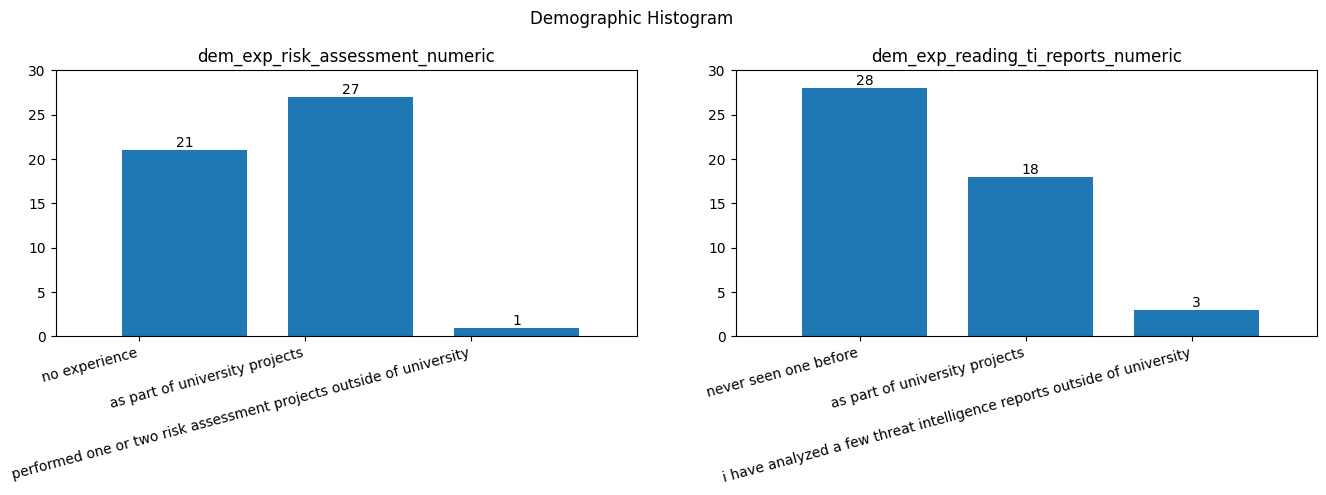

In [ ]:
max_ylim = max(unique_data.groupby(["dem_exp_risk_assessment_numeric"])["respondent_id"].count().max(), unique_data.groupby(["dem_exp_reading_ti_reports_numeric"])["respondent_id"].count().max()) + 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1 = produce_histogram(ax1, unique_data, None, None, "dem_exp_risk_assessment_numeric", MIN_DEMO1, MAX_DEMO1, GROUP_COLORS)
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(experience_mapping_risk_assessment_list, rotation=15, ha="right")
ax1.set_ylim([0,max_ylim])

ax2 = produce_histogram(ax2, unique_data, None, None, "dem_exp_reading_ti_reports_numeric", MIN_DEMO2, MAX_DEMO2, GROUP_COLORS)
ax1.set_xticks([1, 2, 3])
ax2.set_xticklabels(experience_mapping_reading_cti_list, rotation=15, ha="right")
ax2.set_ylim([0,max_ylim])

fig.suptitle("Demographic Histogram")
plt.tight_layout()
plt.show()

## Scatter plots
Represent values for two different numeric variables to compare the two variables.

In [ ]:
def scatter_plot(ax, data, group, groupVal, colors, first, second):
  if group == None:
    data_scatter = data
    color = "blue"
  else:
    data_scatter = data[data[group] == groupVal]
    color = colors[groupVal]

  a, ca = np.unique(np.c_[data_scatter[first],data_scatter[second]], return_counts=True, axis=0)
  ax.scatter(a[:,0],a[:,1],s=ca*50, c=color)

  if "Demo" in first:
    min1 = MIN_DEMO1
    max1 = MAX_DEMO1
  else:
    min1 = MIN_INTERV1
    max1 = MAX_INTERV1

  if "Demo" in second:
    min2 = MIN_DEMO2
    max2 = MAX_DEMO2
  else:
    min2 = MIN_INTERV2
    max2 = MAX_INTERV2

  ax.set_xticks(np.arange(min1, max1+1,1),np.arange(min1, max1+1,1))
  ax.set_yticks(np.arange(min2, max2+1,1),np.arange(min2, max2+1,1))
  if group is not None:
    ax.set_title(group + " " + groupVal)
  return ax

### Demographic Scatter Plot

In [ ]:
def wrap_labels(labels, max_char=41):
    """Wraps text labels with line breaks for better readability."""
    return ['\n'.join(label[i:i+max_char] for i in range(0, len(label), max_char)) for label in labels]

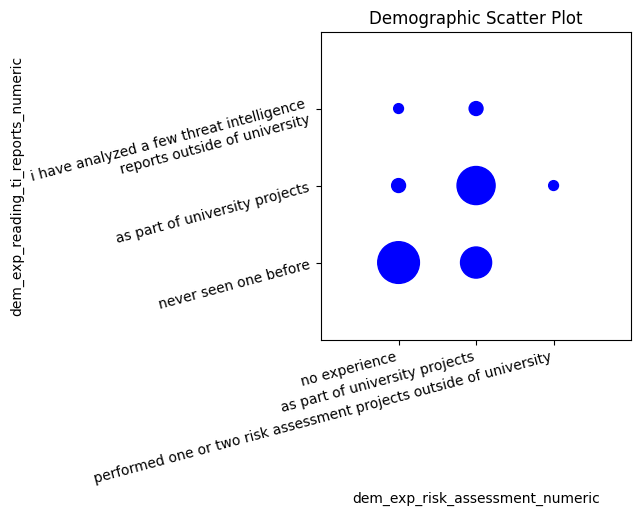

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax = scatter_plot(ax, unique_data, None, None, GROUP_COLORS,"dem_exp_risk_assessment_numeric", "dem_exp_reading_ti_reports_numeric")

ax.set_xlabel("dem_exp_risk_assessment_numeric")
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(experience_mapping_risk_assessment_list, rotation=15, ha="right")
ax.set_ylabel("dem_exp_reading_ti_reports_numeric")
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(wrap_labels(experience_mapping_reading_cti_list), rotation=15, ha="right")
plt.title("Demographic Scatter Plot")
plt.show()

# Intervention Metrics

## Boxplots
A standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

### Intervention Boxplot by Group

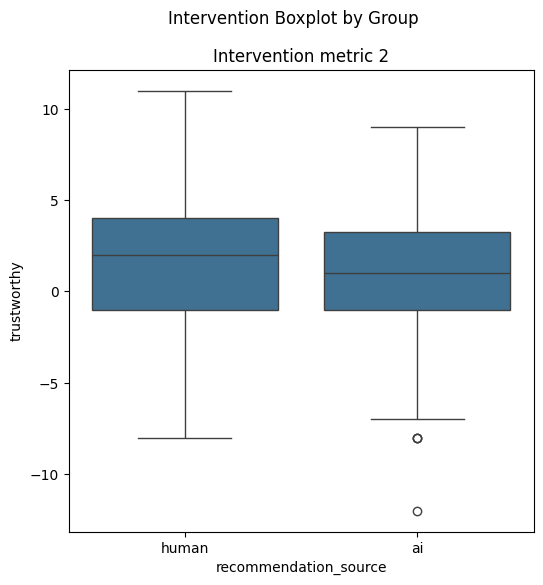

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.set_palette(palette=GROUP_COLORS.values())

sns.boxplot(x='recommendation_source', y='trustworthy', data=data, ax=ax)
ax.set_title("Intervention metric 2")
ax.set_ylabel("trustworthy")

fig.suptitle("Intervention Boxplot by Group")
plt.show()

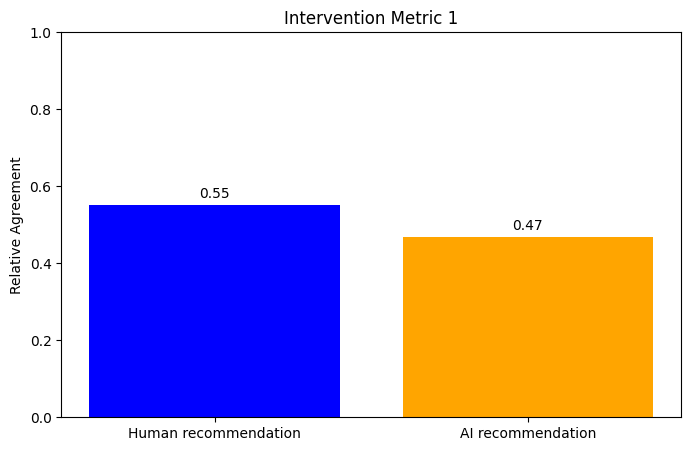

In [ ]:
# Data from your metrics
relative_human_agree = total_human_agree / total_human
relative_ai_agree = total_ai_agree / total_ai

# Bar graph data
categories = ['Human recommendation', 'AI recommendation']
values = [relative_human_agree, relative_ai_agree]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(categories, values, color=['blue', 'orange'])

# Annotate bars with the values
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{value:.2f}", ha='center', va='bottom')

# Add labels and title
ax.set_ylabel('Relative Agreement')
ax.set_title('Intervention Metric 1')
plt.ylim(0, 1)  # Since values are between 0 and 1

plt.show()

### Intervention Boxplot by Scenario

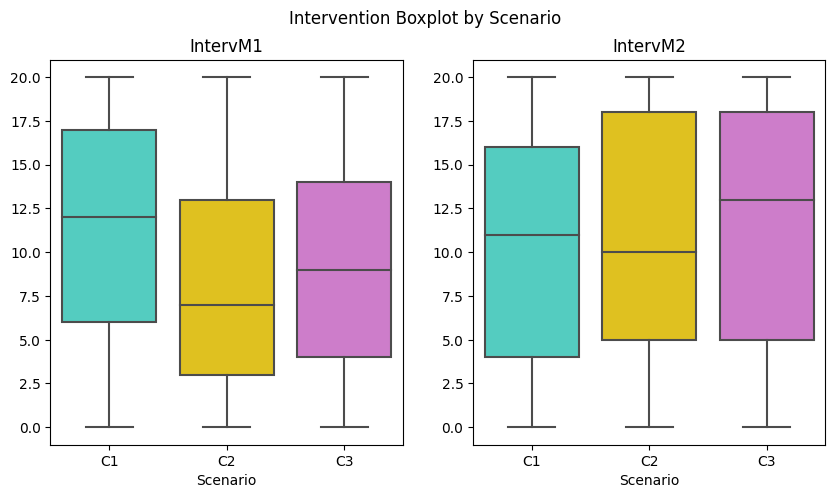

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_palette(palette=SCENARIO_COLORS.values())

sns.boxplot(x='Scenario', y='IntervM1', data=data, ax=axes[0])
axes[0].set_title("IntervM1")
axes[0].set_ylabel("")

sns.boxplot(x='Scenario', y='IntervM2', data=data, ax=axes[1])
axes[1].set_title("IntervM2")
axes[1].set_ylabel("")

fig.suptitle("Intervention Boxplot by Scenario")
plt.show()

## Scatter plot

### Intervention Scatter Plot by Group

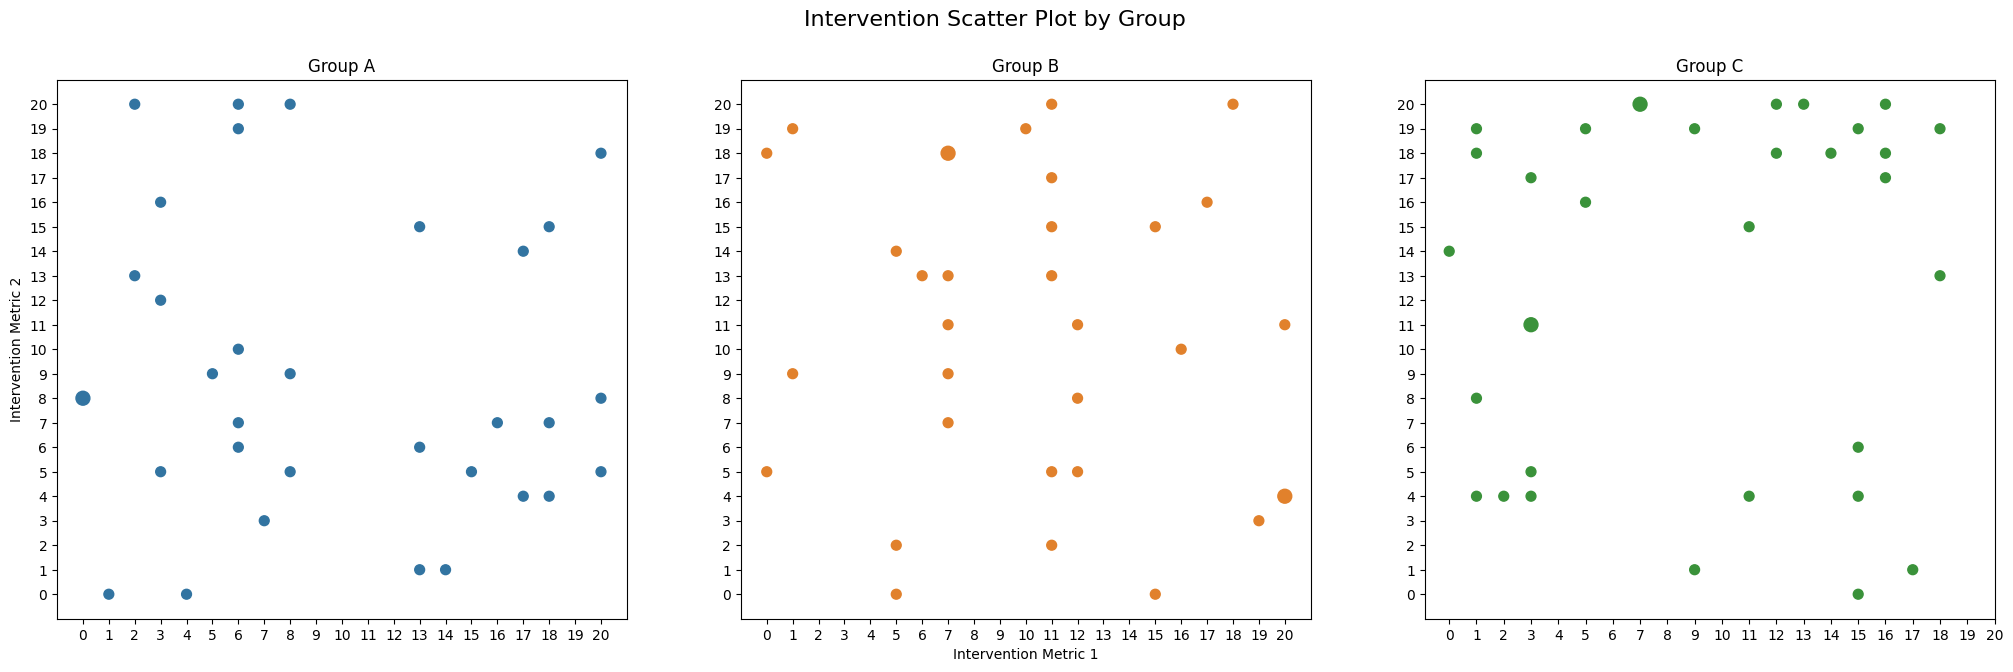

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 7))

ax1 = scatter_plot(ax1, data, "Group", "A", GROUP_COLORS, "IntervM1", "IntervM2")
ax2 = scatter_plot(ax2, data, "Group", "B", GROUP_COLORS, "IntervM1", "IntervM2")
ax3 = scatter_plot(ax3, data, "Group", "C", GROUP_COLORS, "IntervM1", "IntervM2")

ax2.set_xlabel("Intervention Metric 1")
ax1.set_ylabel("Intervention Metric 2")

fig.suptitle("Intervention Scatter Plot by Group",fontsize=16)
plt.show()

# Perception Metric

## Histograms

### Perception Histogram

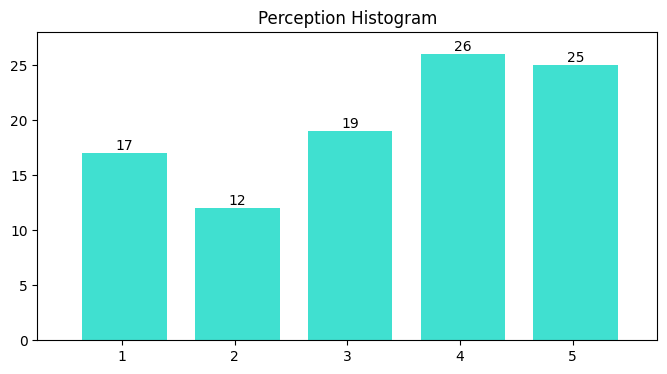

In [ ]:
max_ylim = data.groupby(["PercM"])["SID"].count().max()+2

fig, ax = plt.subplots(figsize=(8, 4))

ax = produce_histogram(ax, data, None, None, "PercM", MIN_PERC, MAX_PERC, GROUP_COLORS)
ax.set_ylim([0,max_ylim])

plt.title("Perception Histogram")
plt.show()

## Boxplots

### Perception Boxplot by Group


In [ ]:
correct_df = data[data['per_likelihood_correct'] == True]
not_correct_df = data[data['per_likelihood_correct'] == False]


In [ ]:
# grouped_data = correct_df.groupby('recommendation_source')['trustworthy'].mean().reset_index()

# # Create the bar plot
# plt.figure(figsize=(8, 6))
# sns.barplot(x='recommendation_source', y='trustworthy', data=grouped_data, palette='Set2')

# # Add labels and title
# plt.xlabel('Recommendation Source')
# plt.ylabel('Average Trustworthy Score')
# plt.title('Average trustworthy score for repsonses where the participant submitted the same likelihood as the NCSC')

# # Show the plot
# plt.show()

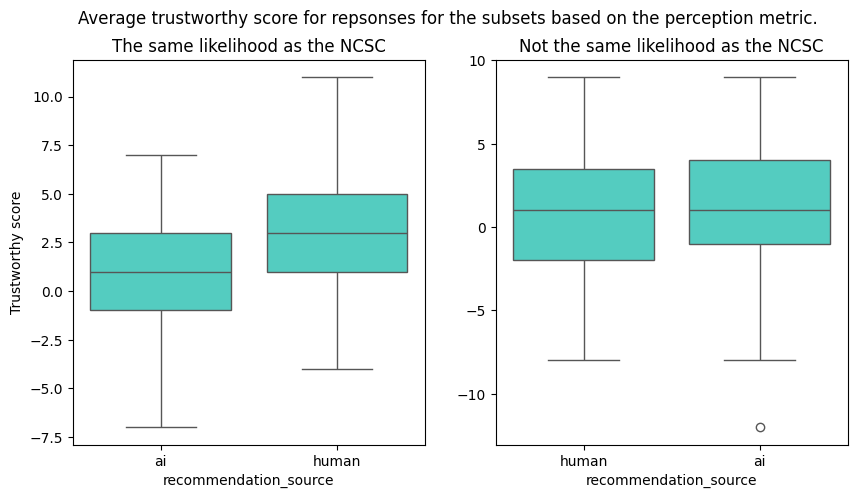

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_palette(palette=SCENARIO_COLORS.values())

sns.boxplot(x='recommendation_source', y='trustworthy', data=correct_df, ax=axes[0])
axes[0].set_title("The same likelihood as the NCSC")
axes[0].set_ylabel("Trustworthy score")

sns.boxplot(x='recommendation_source', y='trustworthy', data=not_correct_df, ax=axes[1])
axes[1].set_title("Not the same likelihood as the NCSC")
axes[1].set_ylabel("")

fig.suptitle("Average trustworthy score for repsonses for the subsets based on the perception metric.")

plt.show()

### Perception Boxplot by Scenario

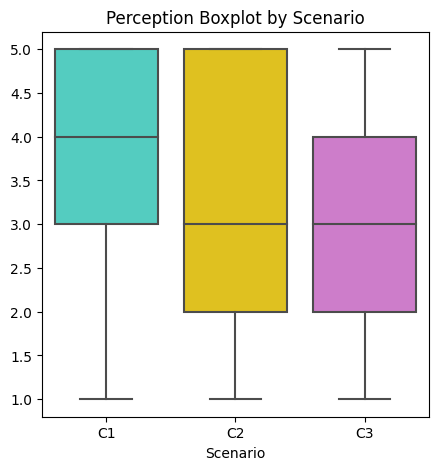

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.set_palette(palette=SCENARIO_COLORS.values())

sns.boxplot(x='Scenario', y='PercM', data=data, ax=ax)
ax.set_title("Perception Boxplot by Scenario")
ax.set_ylabel("")

plt.show()

# Statistical Test

# Analyze zero vs non-zero with Chi-square and Wilcoxon

In case your metrics determine an excess of zeros we need to split the analysis in two test:


1.   A test to determine an effect by a binary distinction: zero - non zero
2.   A test to determine an effect on the non-zero part of data. Ignoring in the analysis the zeros



In [ ]:
#define threshold for zero/non-zero or keep zero as the threshold
threshold_intervm1 = 3 #here your choice, it can also be zero
threshold_intervm2 = 0 #here your choice, it can also be zero

#all below threshold and equal is zero, else is non-zero
data_zero_non_zero = data.copy()
# data_zero_non_zero.loc[data_zero_non_zero['IntervM1']<=threshold_intervm1,'IntervM1']=0
# data_zero_non_zero.loc[data_zero_non_zero['IntervM1']>threshold_intervm1,'IntervM1']=1

data_zero_non_zero.loc[data_zero_non_zero['trustworthy']<=threshold_intervm2,'trustworthy']=0
data_zero_non_zero.loc[data_zero_non_zero['trustworthy']>threshold_intervm2,'trustworthy']=1

#chi-square test zero-non zero
contingency_table = pd.crosstab(data_zero_non_zero.recommendation_source, data_zero_non_zero.trustworthy)
print(contingency_table)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data_zero_non_zero.Group, data_zero_non_zero.IntervM2)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

trustworthy             0    1
recommendation_source         
ai                     73  123
human                  68  128
Group x IntervM1 Chi_square value 0.17722019722528326 p value 0.673773123536362 degrees of freedom 1


AttributeError: 'DataFrame' object has no attribute 'Group'

Inspect only non-zero values using Wilcoxon

In [ ]:
#ignore zero values

data_nonzero_intervm1 = data[data['IntervM1']>threshold_intervm1]
data_nonzero_intervm2 = data[data['IntervM2']>threshold_intervm2]

from itertools import combinations

#groups do not change
group_pairs = list(combinations(data["Group"].unique(), 2))

my_groups = data_nonzero_intervm1["Group"].unique()

#A vs B
stat, p = stats.ranksums(x=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[0]]['IntervM1'], y=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[1]]['IntervM1'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[1],stat, p))
#A vs C
stat, p = stats.ranksums(x=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[0]]['IntervM1'], y=data_nonzero_intervm1[data_nonzero_intervm1.Group == my_groups[2]]['IntervM1'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[2],stat, p))

#same for intervM2
my_groups = data_nonzero_intervm2["Group"].unique()

stat, p = stats.ranksums(x=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[0]]['IntervM2'], y=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[1]]['IntervM2'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM2', my_groups[0], my_groups[1],stat, p))

stat, p = stats.ranksums(x=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[0]]['IntervM2'], y=data_nonzero_intervm2[data_nonzero_intervm2.Group == my_groups[2]]['IntervM2'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM2', my_groups[0], my_groups[2],stat, p))

IntervM1 Group A x Group B stat = 0.34695269929572436, p-value = 0.7286268544611718
IntervM1 Group A x Group C stat = -0.13858046563114676, p-value = 0.8897816805144166
IntervM2 Group A x Group B stat = -1.1051680247435742, p-value = 0.26908678923020624
IntervM2 Group A x Group C stat = -1.8560025494890027, p-value = 0.06345319466281887


## If data is ordinal, perform Wilcoxon Ranksum Tests

In case we do not have an excess of zeros we can directly apply Wilcoxon if ordinal

In [ ]:
from itertools import combinations

my_groups = data["recommendation_source"].unique()

#A vs B
# stat, p = stats.ranksums(x=data[data.Group == my_groups[0]]['IntervM1'], y=data[data.Group == my_groups[1]]['IntervM1'], alternative = 'two-sided')
# print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[1],stat, p))
# #A vs C
# stat, p = stats.ranksums(x=data[data.Group == my_groups[0]]['IntervM1'], y=data[data.Group == my_groups[2]]['IntervM1'], alternative = 'two-sided')
# print("{} Group {} x Group {} stat = {}, p-value = {}".format('IntervM1', my_groups[0], my_groups[2],stat, p))

#same for intervM2
stat, p = stats.ranksums(x=data[data.Group == my_groups[0]]['trustworthy'], y=data[data.Group == my_groups[1]]['IntervM2'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('trustworthy', my_groups[0], my_groups[1],stat, p))

stat, p = stats.ranksums(x=data[data.Group == my_groups[0]]['trustworthy'], y=data[data.Group == my_groups[2]]['IntervM2'], alternative = 'two-sided')
print("{} Group {} x Group {} stat = {}, p-value = {}".format('trustworthy', my_groups[0], my_groups[2],stat, p))

AttributeError: 'DataFrame' object has no attribute 'Group'

In [ ]:
from itertools import combinations

scenario_pairs = list(combinations(data["Scenario"].unique(), 2))

for pair in scenario_pairs:
  stat, p = stats.ranksums(x=data[data.Scenario == pair[0]]['IntervM1'], y=data[data.Scenario == pair[1]]['IntervM1'], alternative = 'two-sided')
  print("{} Scenario {} x Scenario {} stat = {}, p-value = {}".format('IntervM1', pair[0], pair[1],stat, p))

  stat, p = stats.ranksums(x=data[data.Scenario == pair[0]]['IntervM2'], y=data[data.Scenario == pair[1]]['IntervM2'], alternative = 'two-sided')
  print("{} Scenario {} x Scenario {} stat = {}, p-value = {}".format('IntervM2', pair[0], pair[1],stat, p))

IntervM1 Scenario C1 x Scenario C2 stat = 1.3914545331028711, p-value = 0.16408763786000768
IntervM2 Scenario C1 x Scenario C2 stat = -0.455268533872368, p-value = 0.6489160608241231
IntervM1 Scenario C1 x Scenario C3 stat = 1.5004624919173817, p-value = 0.13349464240555095
IntervM2 Scenario C1 x Scenario C3 stat = -0.5706887255583204, p-value = 0.5682106626445554
IntervM1 Scenario C2 x Scenario C3 stat = -0.14748135604316145, p-value = 0.8827520945320161
IntervM2 Scenario C2 x Scenario C3 stat = -0.21160368475757949, p-value = 0.8324162344076115


## If data is binary, perform Chi-Square Test.

In case we do not have an excess of zeros we can directly apply Chi-Square if binary

In [ ]:
contingency_table = pd.crosstab(data.recommendation_source == 'ai', data.trustworthy)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

contingency_table = pd.crosstab(data.recommendation_source == 'human', data.trustworthy)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Group x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

# contingency_table = pd.crosstab(data.Scenario, data.IntervM1)
# chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
# print(f'Scenario x IntervM1 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

# contingency_table = pd.crosstab(data.Scenario, data.IntervM2)
# chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
# print(f'Scenario x IntervM2 Chi_square value {chi2} p value {p} degrees of freedom {dof}')

Group x IntervM1 Chi_square value 14.364104228565894 p value 0.8115656559990394 degrees of freedom 20
Group x IntervM1 Chi_square value 14.364104228565894 p value 0.8115656559990394 degrees of freedom 20


# [OPTIONAL] Additional analysis
This is free for students to add additional analysis and plots